In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import matplotlib.dates as mdates

In [106]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [107]:
df = pd.read_csv("/home/helfs/personal/spotify/data/all_radiohead_songs.csv")

In [108]:
df.dtypes

album_type                 object
external_urls              object
href                       object
album_id                   object
images                     object
album_name                 object
release_date               object
release_date_precision     object
total_tracks                int64
type_album                 object
track_id                   object
track_name                 object
acousticness              float64
analysis_url               object
danceability              float64
duration_ms                 int64
energy                    float64
instrumentalness          float64
key                         int64
liveness                  float64
loudness                  float64
mode                        int64
speechiness               float64
tempo                     float64
time_signature              int64
track_href                 object
type_track_features        object
valence                   float64
dtype: object

In [140]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_date'] = df['release_date'].dt.strftime("%Y")
df['duration_mins'] = df['duration_ms'] / 60000

# Duração média dos álbuns

In [141]:
df_duracoes = df.groupby(['album_name', 'release_date'])['duration_mins'].mean()
df_duracoes = df_duracoes.reset_index()
df_duracoes

,album_name,release_date,duration_mins
0,A Moon Shaped Pool,2016,4.783798
1,Amnesiac,2001,3.995959
2,Hail To the Thief,2003,4.042619
3,I Might Be Wrong,2001,5.046027
4,In Rainbows,2007,4.264367
5,In Rainbows (Disk 2),2007,3.356017
6,Kid A,2000,4.290309
7,OK Computer,1997,4.473925
8,OK Computer OKNOTOK 1997 2017,2017,4.027120
9,Pablo Honey,1993,3.521167


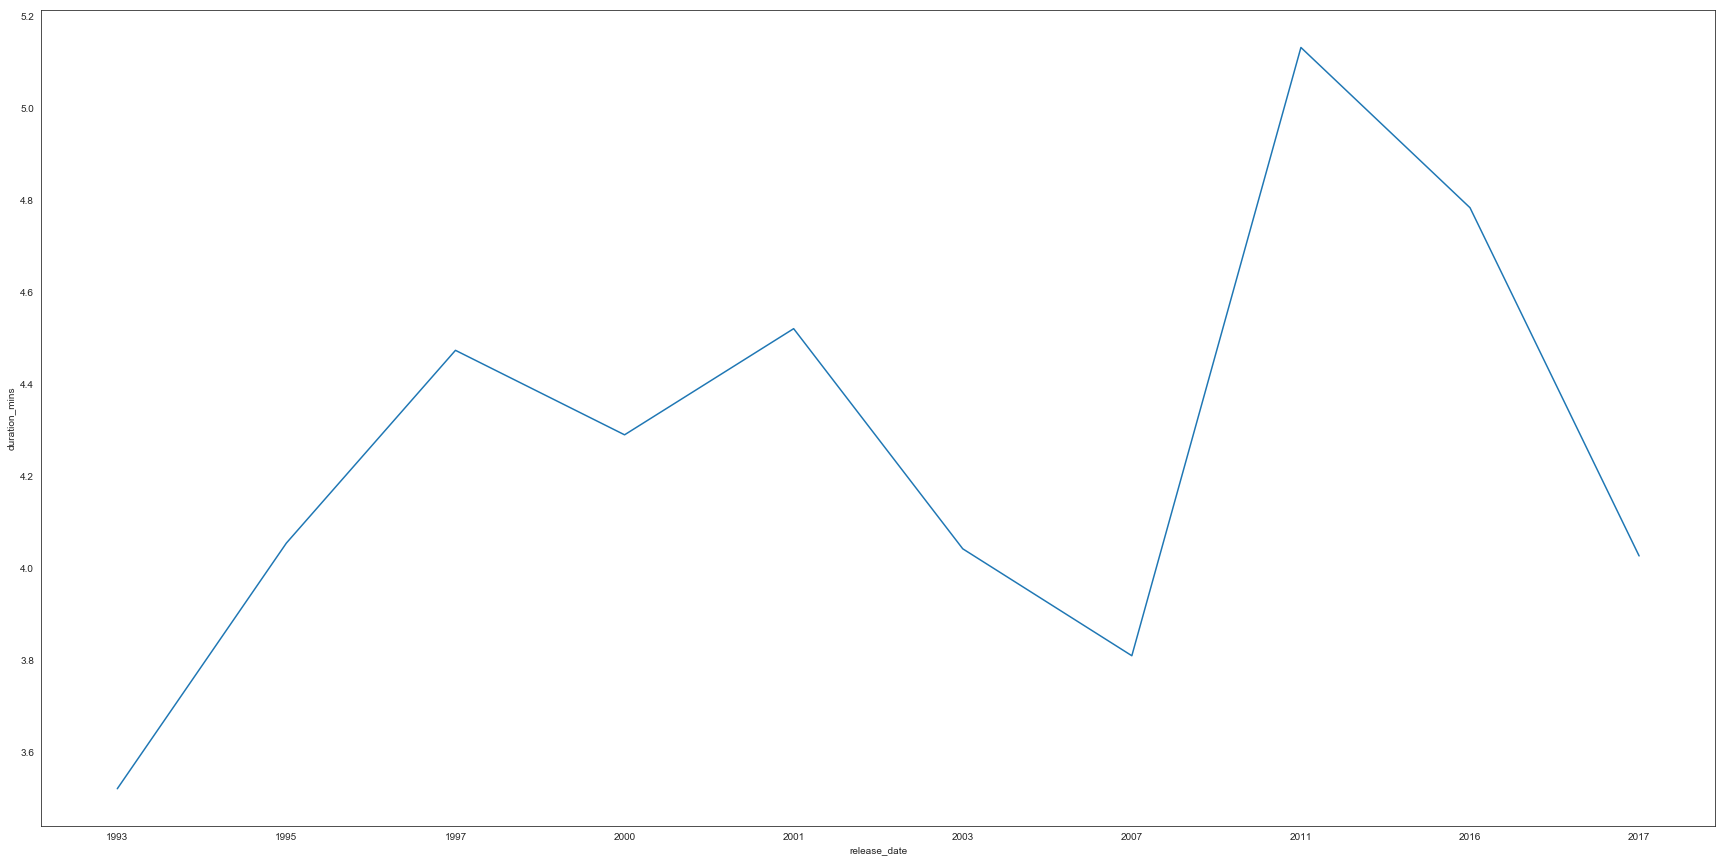

In [143]:
plt.figure(figsize=(30,15))
sns.lineplot(data=df_duracoes, x='release_date', y='duration_mins', ci=None)

In [144]:
studio_albums = ['A Moon Shaped Pool',
 'Amnesiac',
 'Hail To the Thief',
 'In Rainbows',
 'Kid A',
 'OK Computer',
 'Pablo Honey',
 'The Bends',
 'The King Of Limbs']

In [145]:
condition = df.album_name.isin(studio_albums)
filtered_df = df[condition]

Text(0.5, 1.0, 'Radiohead album mean duration')

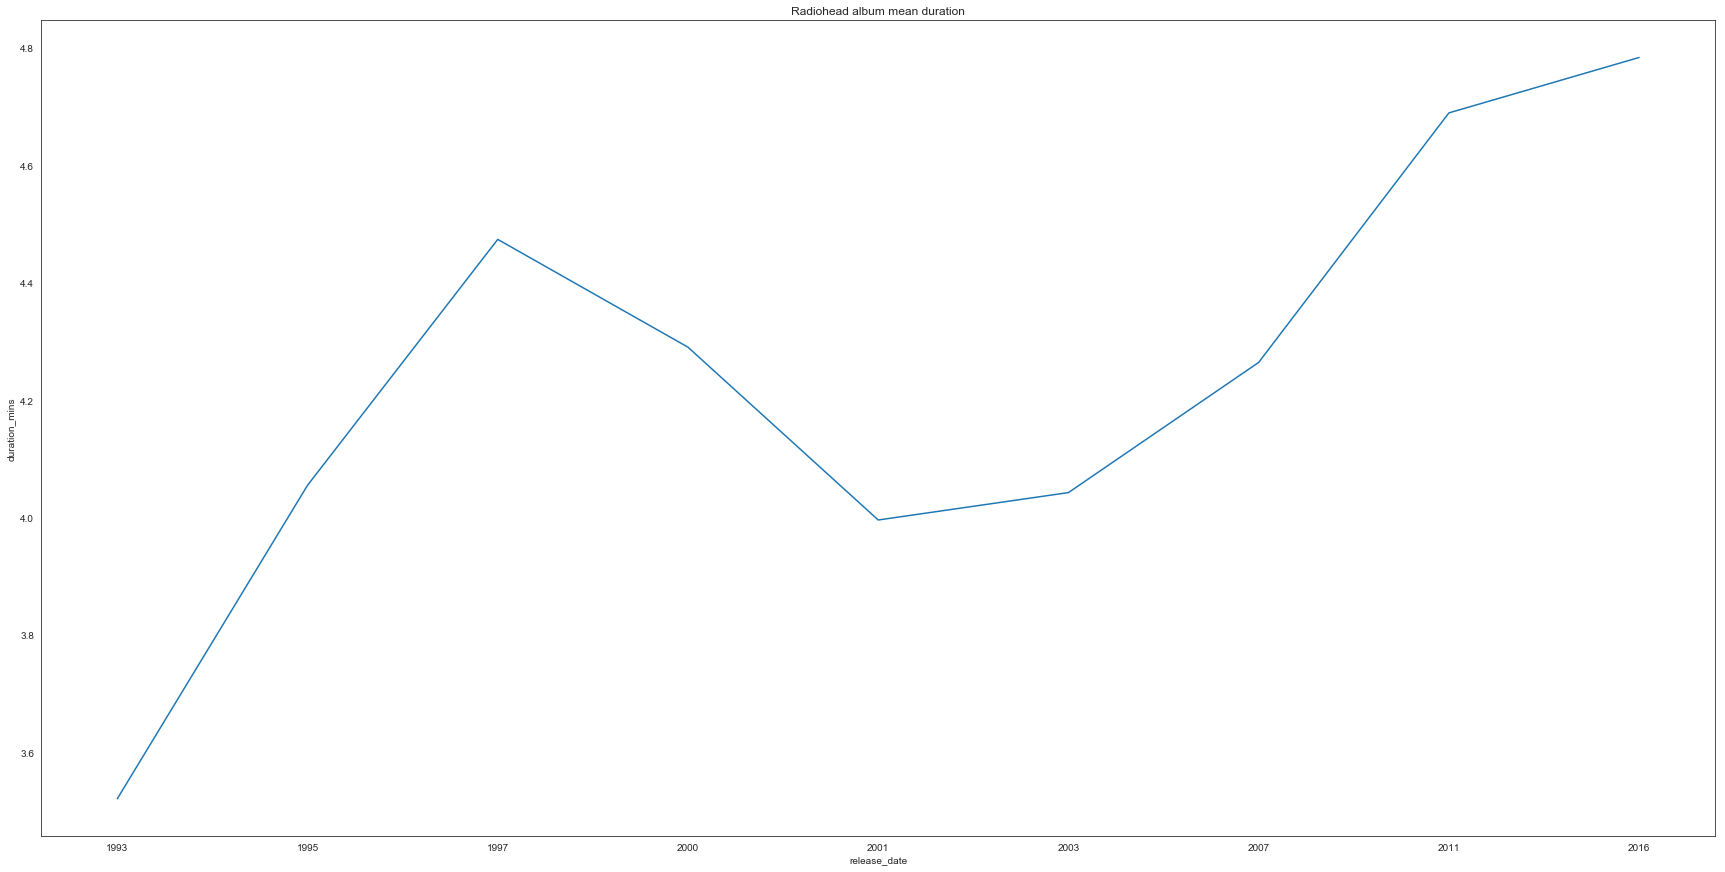

In [146]:
plt.figure(figsize=(30,15))
sns.lineplot(data=filtered_df, x='release_date', y='duration_mins', ci=None).set_title('Radiohead album mean duration')

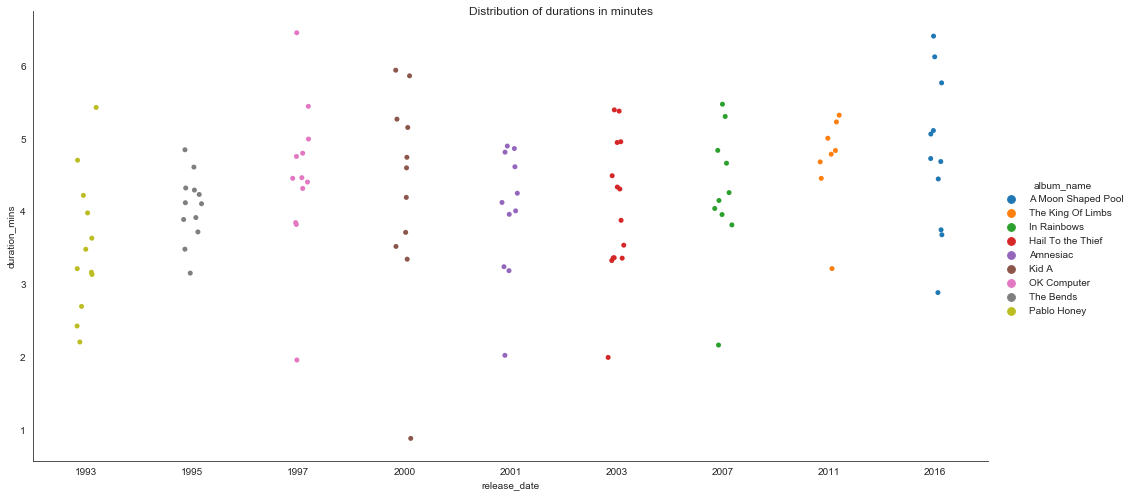

In [152]:
# build the figure
sns.catplot(x="release_date", y="duration_mins", hue='album_name', data=filtered_df,  height=7, aspect=2)
plt.suptitle('Distribution of durations in minutes')
plt.show()

# Discography audio features

Distribution of the features throughout the discography, the reference can be found on the link below:

https://developer.spotify.com/documentation/web-api/reference/object-model/#audio-features-object

In [123]:
desired_columns = ['acousticness', 'danceability', 'instrumentalness', 'energy', 'speechiness', 'album_name']

df_plot = filtered_df[desired_columns]

def plot_features(df, album_title):
    acoustic_features = ['acousticness', 'danceability', 'instrumentalness', 'energy', 'speechiness']
    sns.set_style('white')
    fig, axes = plt.subplots(1,5, figsize=(25,5))
    fig.suptitle(album_title, fontsize="x-large")
    for i, feature in enumerate(acoustic_features):
        sns.distplot(df[feature], ax=axes[i], bins=10, kde=True)
    sns.despine()
    plt.show()

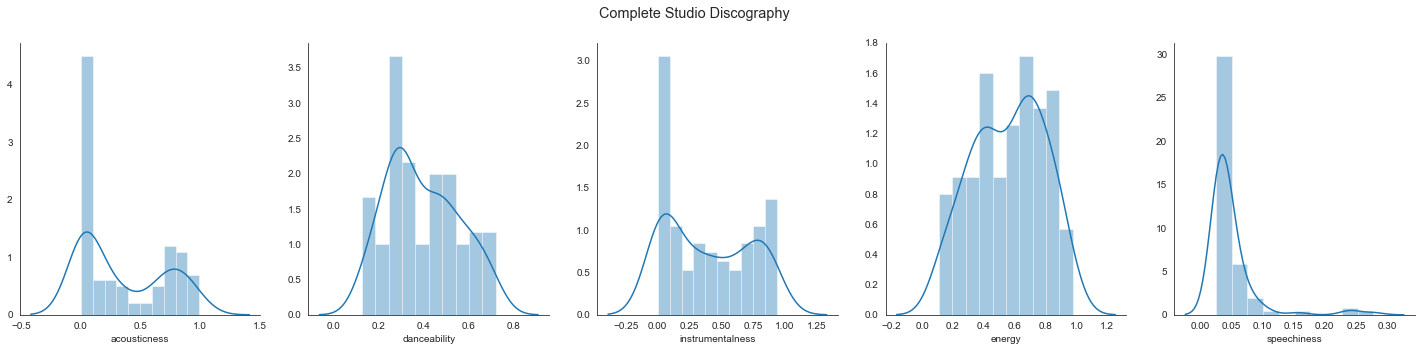

In [124]:
plot_features(df_plot, 'Complete Studio Discography')

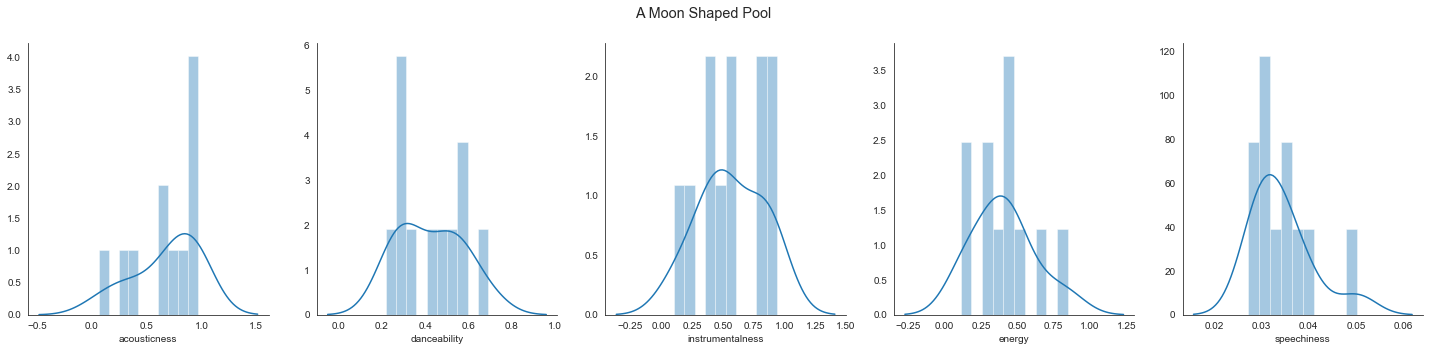

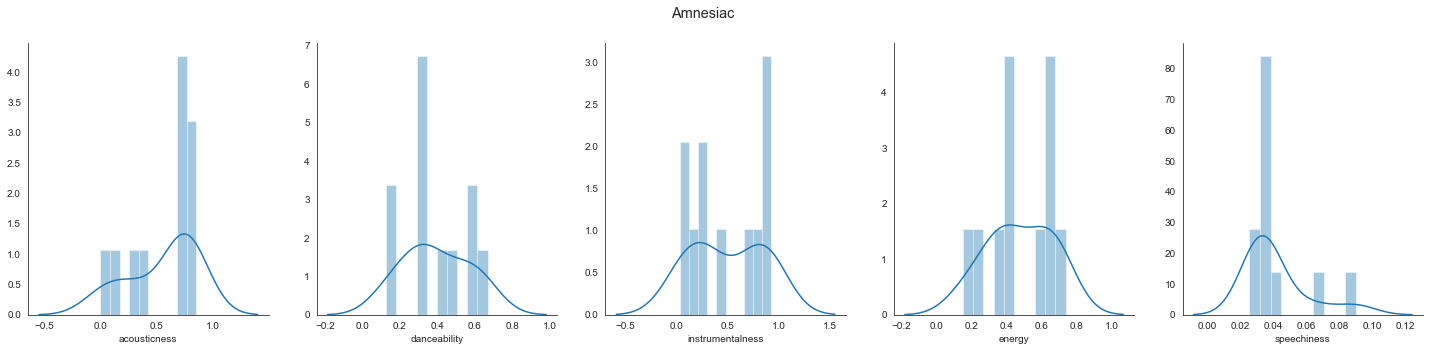

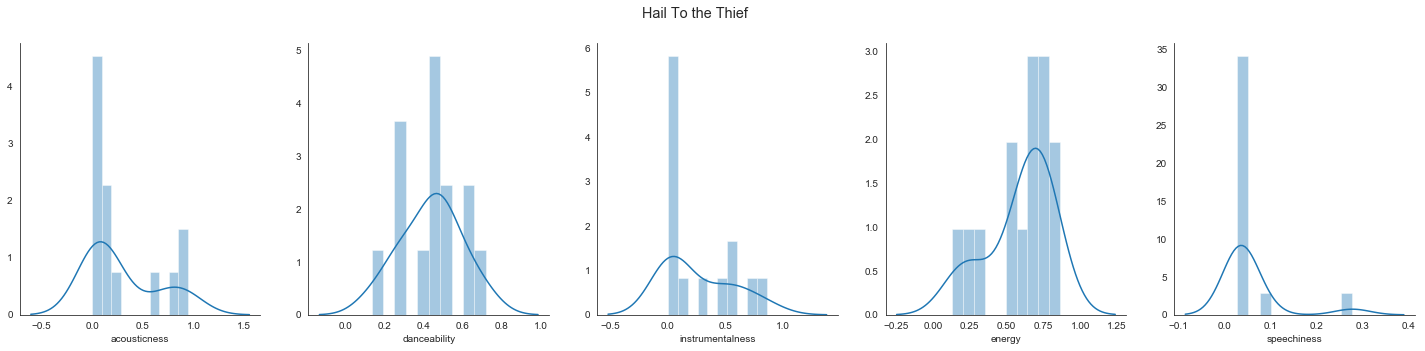

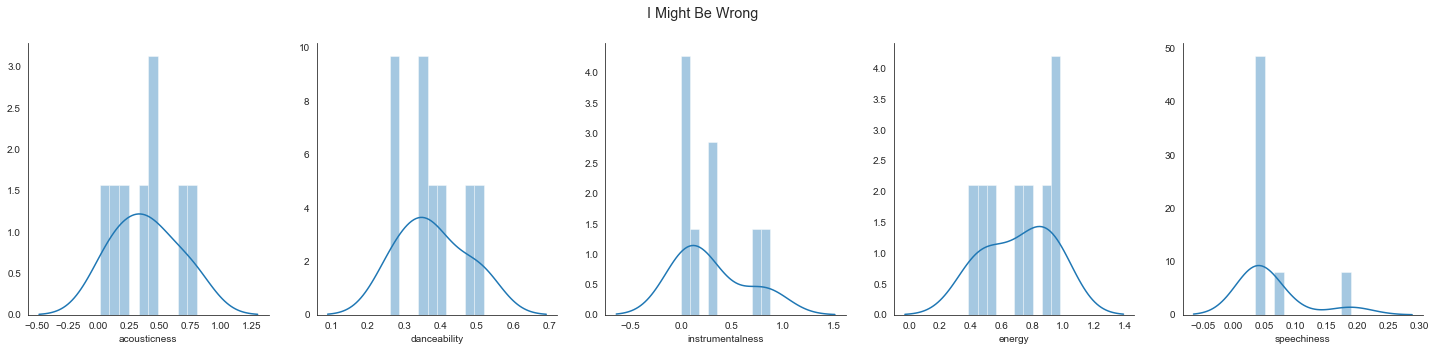

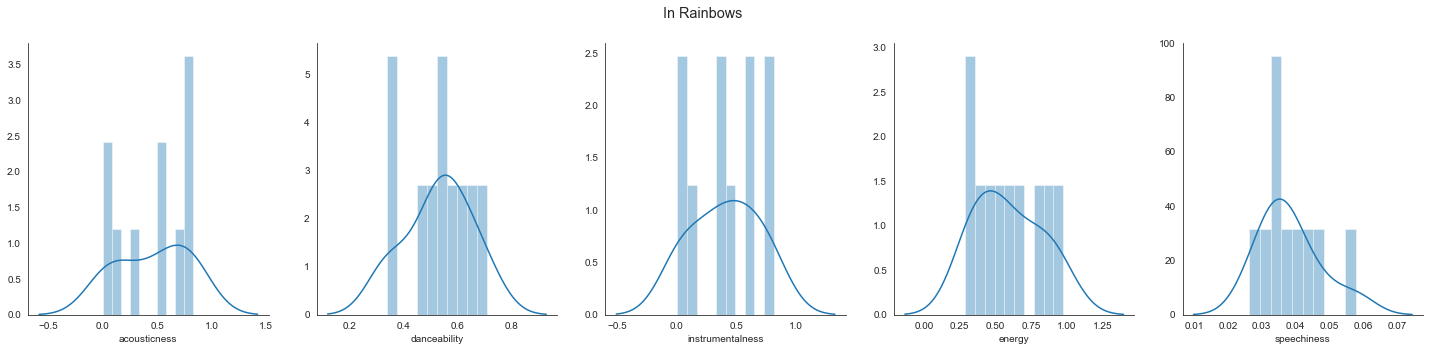

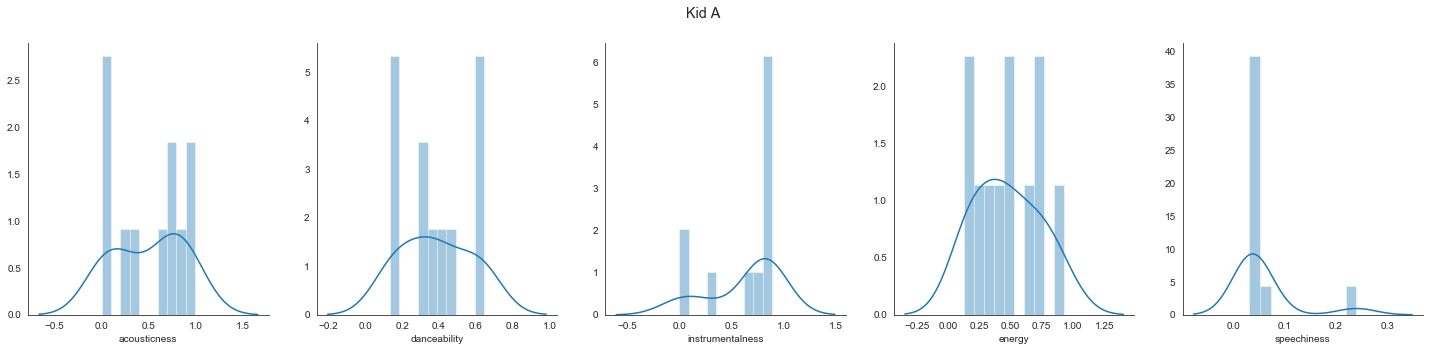

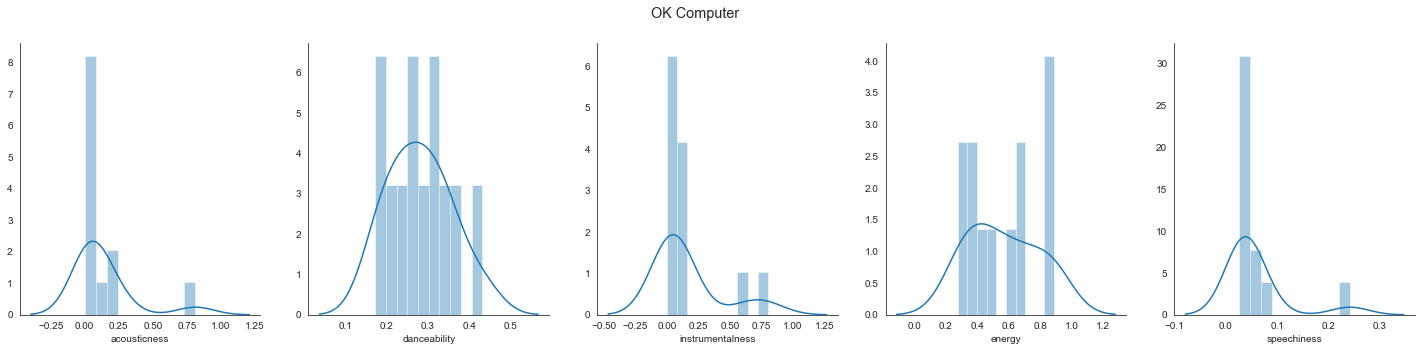

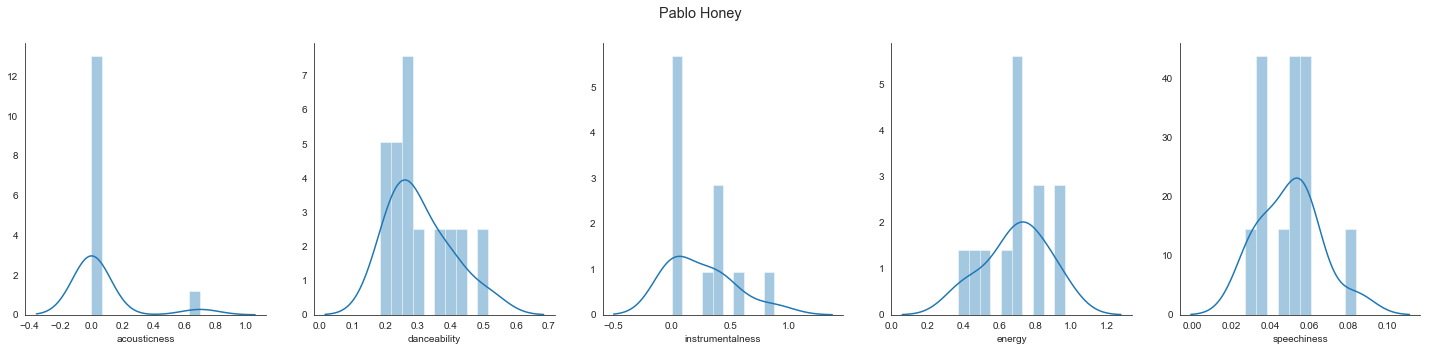

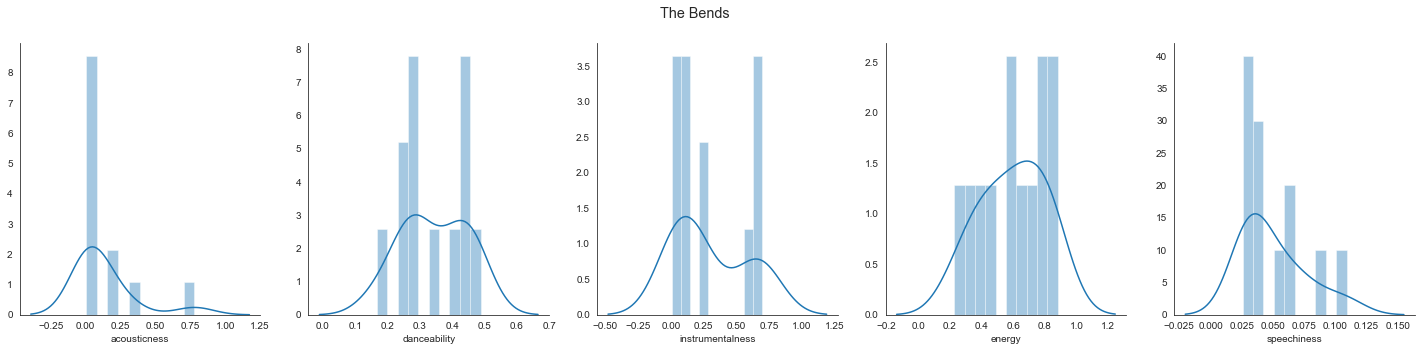

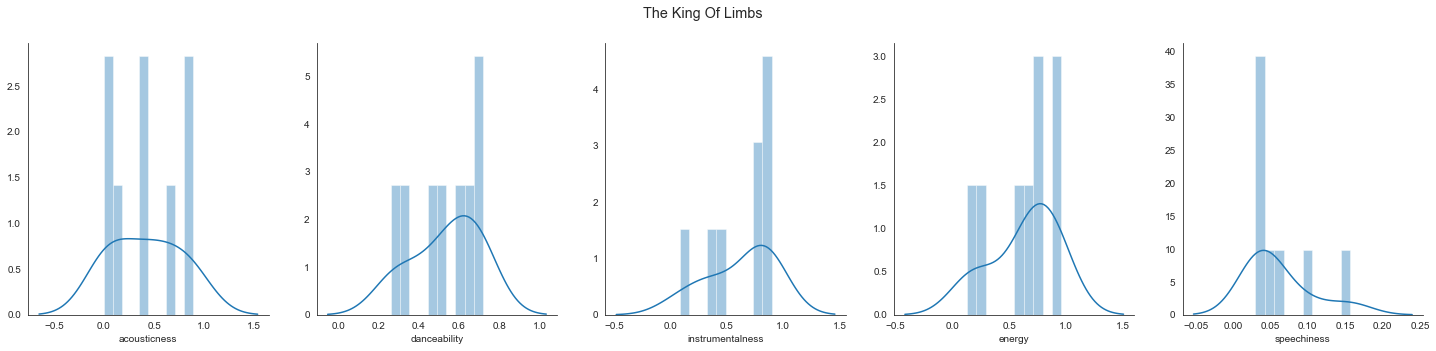

In [90]:
for album in studio_albums:
    test_df = df[df.album_name == album]
    plot_features(test_df, album)

## The same information, but with more details

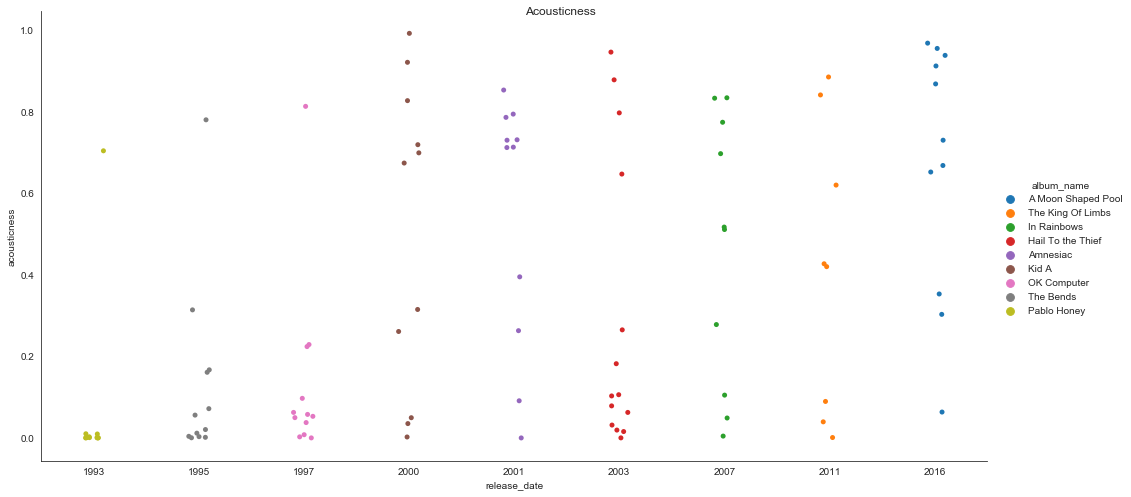

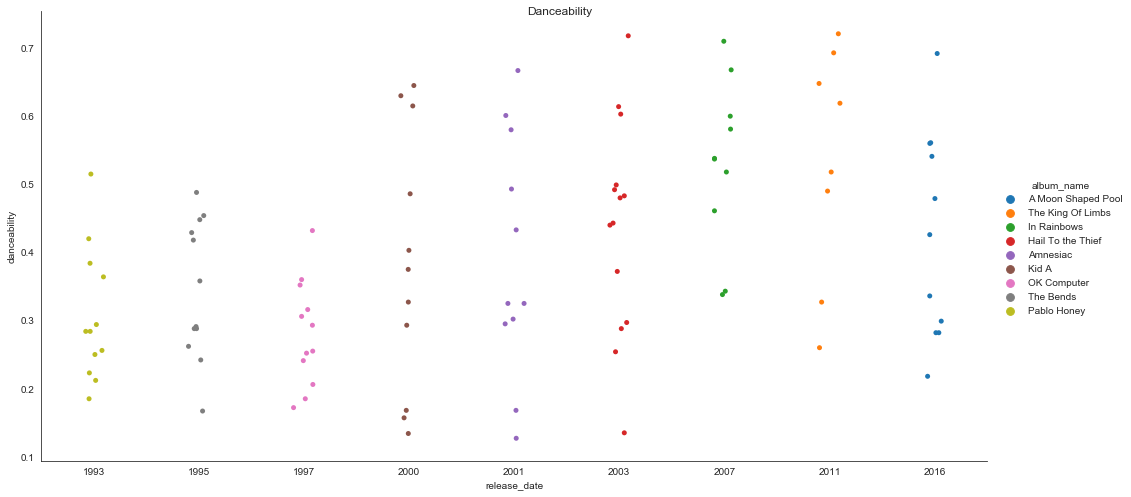

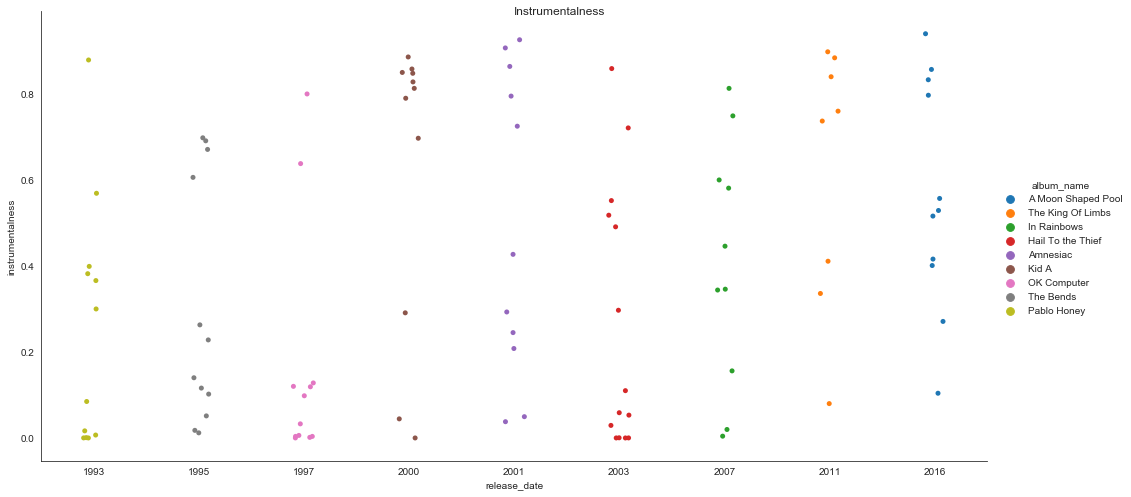

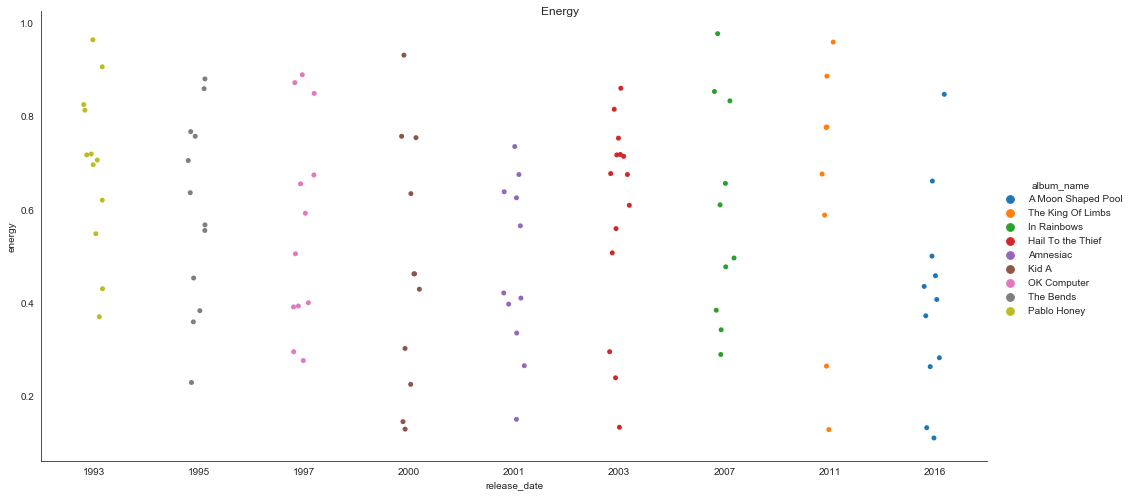

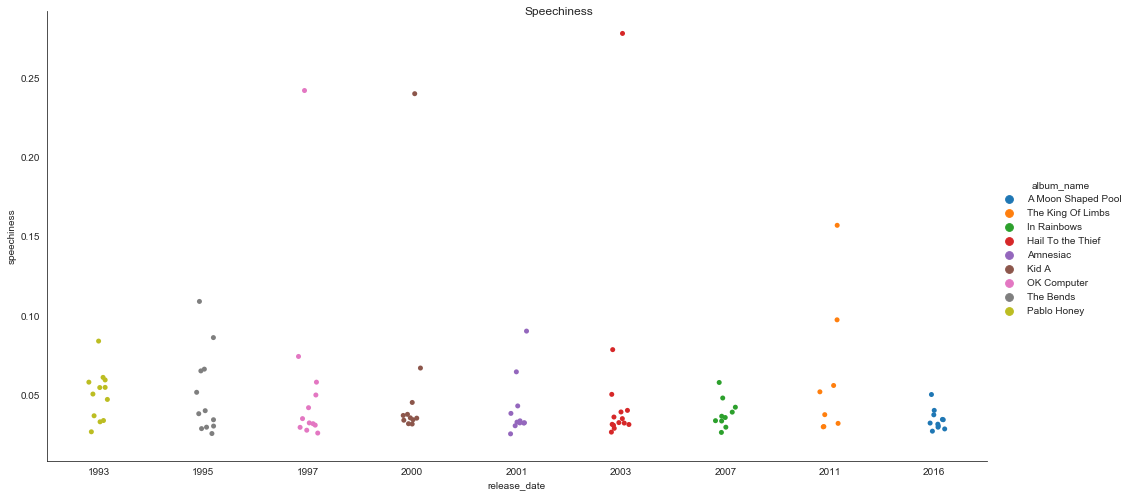

In [154]:
acoustic_features = ['acousticness', 'danceability', 'instrumentalness', 'energy', 'speechiness']

for feature in acoustic_features:
    sns.catplot(x="release_date", y=feature, hue='album_name', data=filtered_df,  height=7, aspect=2)
    plt.suptitle(feature.capitalize())
    plt.show()